Please limit yourself to 4 hours time!

Place your submissions to the Submissions sub-folder with the naming convention: lastname_firstname

The Goal

You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering.

The Data
The data consists of a csv file with 8950 rows (one for each cardholder) organized in columns with descriptive headers.



# import data

In [1]:
import pandas as pd

In [2]:
credit_dat = pd.read_csv('cc_info.csv')

In [3]:
credit_dat.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

## count missing values

In [8]:
#check missing values
credit_dat.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
credit_dat['CUST_ID'].unique().shape

(8950,)

## handle the missing values

In [23]:
from sklearn.ensemble import RandomForestRegressor
# segement dataframe into rows with 'MINIMUM_PAYMENTS' and missing 'MINIMUM_PAYMENTS'
credit_dat_wt_minpayments = credit_dat[
    (pd.isnull(credit_dat['MINIMUM_PAYMENTS']) == False)
    & (pd.isnull(credit_dat['CREDIT_LIMIT']) == False)]
credit_dat_wot_minpayments = credit_dat[
    pd.isnull(credit_dat['MINIMUM_PAYMENTS'])
    & (pd.isnull(credit_dat['CREDIT_LIMIT']) == False)]

In [24]:
# generate a list of variables to be used to impute the missing 'MINIMUM_PAYMENTS'
variables = set(credit_dat.columns) - set(['MINIMUM_PAYMENTS', 'CUST_ID'])
variables = list(variables)
variables

['CASH_ADVANCE',
 'CASH_ADVANCE_FREQUENCY',
 'PRC_FULL_PAYMENT',
 'CREDIT_LIMIT',
 'PURCHASES_TRX',
 'TENURE',
 'CASH_ADVANCE_TRX',
 'ONEOFF_PURCHASES_FREQUENCY',
 'BALANCE_FREQUENCY',
 'INSTALLMENTS_PURCHASES',
 'PAYMENTS',
 'PURCHASES_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'BALANCE',
 'PURCHASES_INSTALLMENTS_FREQUENCY']

In [25]:
# use random forest regressor to impute the missing values
rfModel_min_payments = RandomForestRegressor()
rfModel_min_payments.fit(credit_dat_wt_minpayments[variables],
                         credit_dat_wt_minpayments['MINIMUM_PAYMENTS'])
generated_min_payments = rfModel_min_payments.predict(
    X=credit_dat_wot_minpayments[variables])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
# get the new dataframe with the imputed missing values
credit_dat_wot_minpayments['MINIMUM_PAYMENTS'] = generated_min_payments
data = credit_dat_wot_minpayments.append(credit_dat_wt_minpayments)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Clustering customers

## standardize the data

In [63]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(data.loc[:, data.columns != 'CUST_ID'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Elbow method to decide the number of clusters

In [65]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    clusters = KMeans(n_clusters=k, n_init=10)
    clusters.fit(scaled_data)
    distortions.append(clusters.inertia_)


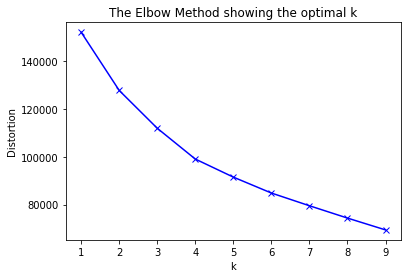

In [66]:
import matplotlib.pyplot as plt
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [67]:
# k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)
y_kmeans = kmeans.predict(scaled_data)

In [68]:
data['cluster'] = y_kmeans

# Correlation among features

In [42]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,932.397811,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2697.302754,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,165.375470,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,300.031066,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,815.300574,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [47]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_purchase,monthly_cash_advance
0,C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,10395.727429,0.0,12,124.916667,17.149001
1,C10047,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,15455.659554,0.0,12,36.416667,15.387391
2,C10049,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,18655.169197,0.0,12,0.000000,165.072767
3,C10056,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,23.373636,0.0,12,25.833333,0.000000
4,C10057,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,4618.595947,0.0,12,106.991667,0.000000


In [70]:
#recency, frequency, monetary
#monthly_purchase & monthly_cash_advance
data['monthly_purchase'] = data['PURCHASES']/data['TENURE']
data['monthly_cash_advance'] = data['CASH_ADVANCE']/data['TENURE']

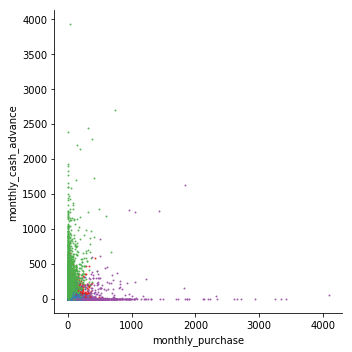

In [77]:
import seaborn
import matplotlib.pyplot as plt
seaborn.lmplot(x='monthly_purchase',
               y='monthly_cash_advance',
               data=data,
               fit_reg=False,
               hue='cluster',
               legend=False,
               palette="Set1",
               scatter_kws={"s": 1})

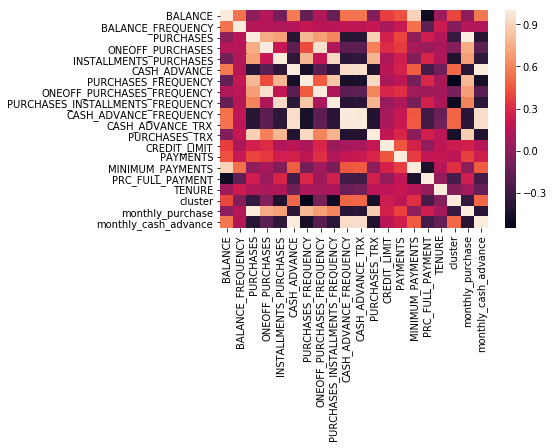

In [78]:
corr = data.corr(method='spearman')
seaborn.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)


# PCA

## PCA and visulization

In [79]:
from scipy import sparse
from sklearn.decomposition import PCA
# reduce dimension to 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
pca2dataFrame = pd.DataFrame(reduced_data)
pca2dataFrame.columns = ['PC1', 'PC2']

In [80]:
print(pca.explained_variance_ratio_) 

[0.27272817 0.20279382]


In [90]:
0.27272817+0.20279382

0.47552199

In [81]:
pca2dataFrame = pd.concat(
    [pca2dataFrame, data['cluster']],
    axis=1)

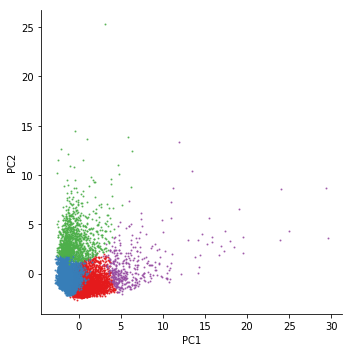

In [82]:
seaborn.lmplot(x='PC1',
               y='PC2',
               data= pca2dataFrame,
               fit_reg=False,
               hue='cluster',
               legend=False,
               palette="Set1",
               scatter_kws={"s": 1})

## top 10 important ingredients on PC1

In [87]:
pc_components = pd.DataFrame(pca.components_,
                             columns=data.columns[1:-3],
                             index=['PC1', 'PC2'])
pc_components.iloc[0, :].sort_values(ascending = False)[0:10]

PURCHASES                           0.411734
PURCHASES_TRX                       0.390827
ONEOFF_PURCHASES                    0.346600
INSTALLMENTS_PURCHASES              0.336676
PURCHASES_FREQUENCY                 0.322127
ONEOFF_PURCHASES_FREQUENCY          0.295276
PURCHASES_INSTALLMENTS_FREQUENCY    0.275058
PAYMENTS                            0.265382
CREDIT_LIMIT                        0.211164
PRC_FULL_PAYMENT                    0.132906
Name: PC1, dtype: float64

## top 10 important ingredients on PC2

In [88]:
pc_components.iloc[1, :].sort_values(ascending = False)[0:10]

CASH_ADVANCE              0.439543
CASH_ADVANCE_FREQUENCY    0.434543
CASH_ADVANCE_TRX          0.419782
BALANCE                   0.404171
PAYMENTS                  0.257438
CREDIT_LIMIT              0.239925
MINIMUM_PAYMENTS          0.162677
BALANCE_FREQUENCY         0.132823
ONEOFF_PURCHASES          0.064985
PURCHASES                 0.042790
Name: PC2, dtype: float64

# Summary

## There are mainly four types of users in the data.
## They are grouped based on the amount of purchases and cash advance.
## Credit card company could offer reduced interest rate or reduced cash advance fee to attrack more users.